Fit the MNIST dataset
-----

![](http://myselph.de/mnistExamples.png)

Starting with the model you architectured in the previous lab, try to create the best classifer!

Here is the [current leaderboard](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)

We'll also have class leaderboard! The top student team will present at the next class session.

-----
Guidelines
-----

__DOs__:

1. You can add as many layers as you want
1. Each layer be any size
1. You can pick any activation function
1. Adjust learning rate (do this last; the default is very good)

__DON'T__:

1. You are restricted to 5 training epochs (for the sake of fast training times)
1. You are restricted to a Sequential models (later we'll learn about other models)
1. You are restricted to Dense layers (later we'll about other layer types)
1. You are restricted to SGD (later we'll learn other optimization techniques)
1. You are restricted from using regularization (again later)

-----

Tune by hand to start with to get a "feel" for the parameters. Remember they are probably nonlinear (i.e., an one step change in x will not result in a fixed change in accuracy). Then you are free to use random search, grid search, genetic algorithms, or Bayesian optimization.

In [342]:
reset -fs

In [429]:
import keras
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


----
Prepare data
----

In [365]:
from keras.datasets import mnist

In [389]:
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [390]:
x_train.shape

(60000, 28, 28)

In [391]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [392]:
from matplotlib import pyplot
from scipy.misc import toimage

%matplotlib inline

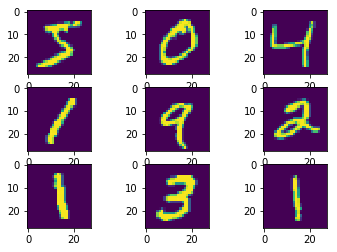

In [393]:
# Create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(toimage(x_train[i]))
    
pyplot.show()

In [394]:
x_train.shape

(60000, 28, 28)

In [395]:
# Munge data
image_size = 784 # 28 x 28

x_train = x_train.reshape(x_train.shape[0], image_size) # Transform from matrix to vector
x_train = x_train.astype('float32')
x_train /= 255 # Normalize inputs from 0-255 to 0.0-1.0

x_test = x_test.reshape(x_test.shape[0], image_size) # Transform from matrix to vector
x_test = x_test.astype('float32')
x_test /= 255 # Normalize inputs from 0-255 to 0.0-1.0

print('Number of train examples:', x_train.shape[0])
print('Number of test examples:', x_test.shape[0])

Number of train examples: 60000
Number of test examples: 10000


In [396]:
x_train.shape

(60000, 784)

----
Define architecture
-----

In [464]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras as keras

In [477]:
# Define model
model = Sequential()

In [478]:
# Define input layer
layer_input = Dense(units=512, 
                    activation='relu', 
                    input_shape=(image_size,))

model.add(layer_input)

In [479]:
# Define input layer
layer_input = Dense(units=512, 
                    activation='relu', 
                    input_shape=(image_size,))

model.add(layer_input)

In [480]:
# Define input layer
layer_input = Dense(units=512, 
                    activation='relu', 
                    input_shape=(image_size,))

model.add(layer_input)

In [481]:
# Define input layer
layer_input = Dense(units=510, 
                    activation='relu', 
                    input_shape=(image_size,))

model.add(layer_input)

In [482]:
# # Define another layer
# layer_input = Dense(units=510, 
#                     activation='relu')

# model.add(layer_input)

In [483]:
# # Define another layer
# layer_input = Dense(units=510, 
#                     activation='relu')

# model.add(layer_input)

In [484]:
# Define output layers
layer_output = Dense(units=num_classes,
                     activation='softmax')

model.add(layer_output)

In [485]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_126 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_127 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_128 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_129 (Dense)            (None, 510)               261630    
_________________________________________________________________
dense_130 (Dense)            (None, 10)                5110      
Total params: 1,193,972.0
Trainable params: 1,193,972
Non-trainable params: 0.0
_________________________________________________________________


In [486]:
from keras.optimizers import SGD

In [472]:
learning_rate = 0.25 #best

model.compile(optimizer=SGD(lr=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

----
Train model
-----

In [473]:
batch_size = 128
epochs = 5 # 20 is good number; But let's limit it to 5

In [474]:
history = model.fit(x_train, 
                    y_train,
                    batch_size=batch_size, 
                    epochs=epochs,
                    verbose=True, 
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 16s - loss: 0.3216 - acc: 0.9022 - val_loss: 0.1392 - val_acc: 0.9563

In [475]:
score = model.evaluate(x_test, 
                       y_test, 
                       verbose=True)

 9984/10000 [============================>.] - ETA: 0s

In [476]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0979482411667
Test accuracy: 0.9692


- grid search learning rate

In [487]:
import numpy as np

In [488]:
# test sample for gridsearch 
x_train_sample = x_train[:5000,:]
x_test_sample = x_test[:5000,:]
y_train_sample = y_train[:5000,:]
y_test_sample = y_test[:5000,:]

In [489]:
learning_rate_test = []
learning_rate_test_loss = []
lambda_ = np.linspace(.1,.7,20)
for i in np.linspace(.1,.7,20):
    learning_rate = i

    model.compile(optimizer=SGD(lr=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    
    history = model.fit(x_train_sample, 
                    y_train_sample,
                    batch_size=batch_size, 
                    epochs=epochs,
                    verbose=True, 
                    validation_data=(x_test_sample, y_test_sample))
    score = model.evaluate(x_test_sample, 
                       y_test_sample)
    learning_rate_test.append(score[1])
    learning_rate_test_loss.append(score[0])
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('Learning rate', i)

Train on 5000 samples, validate on 5000 samples
Epoch 1/5
5000/5000 [==============================] - 3s - loss: 1.6393 - acc: 0.5688 - val_loss: 2.6535 - val_acc: 0.3308

In [496]:
np.argmax(np.array(learning_rate_test_loss))

0

In [504]:
lambdas_ = [_ for _ in np.linspace(.1,.7,20)]

In [505]:
lambdas_[np.argmax(np.array(learning_rate_test))] # best lambda

0.63684210526315788

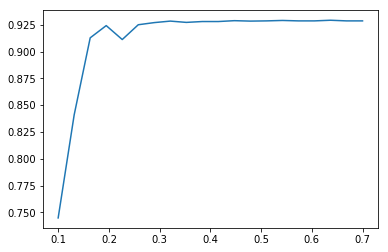

In [492]:
plt.plot([_ for _ in np.linspace(.1,.7,20)],learning_rate_test)

In [493]:
# best learning rate at  with two hidden layers .63

In [433]:
# results
# default three layers with learning rate at .1 = 92%
# four layers, two hidden layers, accuracy of 93.3%
# two hidden layers, with sigmoid activation for second layer, accuracy of 88%
# three hidden layers (all relu), 93.7%
# three hidden layers, (last softamx) - acuracy 11%
# three hidden layers, size of 1024 nodes, 93.5%
# four hidden layers, 100 units, all relu 93.3%
# four hidden layers, sigmoid and relu 100-1000nodes per hidden layer 85%
# five layers, all relu, 100 nodes 93.08%
# five layers, all relu, 100 nodes learning rate of .10 - 9.8%
# three hidden layers, 512 nodes, learning rate .10, all relu, -96% 
# four hidden layers, 512 nodes, learning rate .10, all relu, -97.5%
# five hidden layers, 512 nodes, learning rate .10, all relu, - 96.5%

What are the __most important__ hyperparameters to adjust improve training accuracy?

In [434]:
# the learning rate is the most important to improve training accuracy

What are the __least important__ hyperparameters to adjust improve training accuracy?

In [ ]:
# the size of the input layer

Which of the __DON'T__ tunning options do think will make the biggest difference?

In [ ]:
# regularization by using dropout
# Also, incresing the number of epochs will help

A note on significance of improvement
-----

How significant would an improvement from 0.98 to 0.993 be?  

Remember that the original impetus for MNIST etc was the USPS wanting to reduce the number of items that needed to be handled by a postal worker.  

At one point, the USPS handled 510 million items each day.  

Accuracy of 0.98 (2% error rate) would mean 10.2 million items that have to be touched by a human - either the zip code read or the piece of mail picked up at the wrong address and delivered a second time.  

By contrast accuracy of 0.993 means 3.7 millions items that need human intervention. 

<br>
<br> 
<br>

----